In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import normalize, StandardScaler
import matplotlib.pyplot as plt
pd.options.display.max_columns=50
pd.options.display.max_colwidth=200

In [2]:
data =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/UNSW-NB15_1.csv', header = None, dtype={1: 'object'})
data.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,47) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,29,0,0,dns,500473.93750,621800.93750,2,2,0,0,0,0,66,82,0,0,0.00000,0.000000,1421927414,1421927414,0.017,0.013000,0.0,0.0,0.0,0,0,0,0,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,29,0,0,-,87676.08594,50480.17188,4,4,0,0,0,0,132,76,0,0,9.89101,10.682733,1421927414,1421927414,7.005,7.564333,0.0,0.0,0.0,0,0,0,0,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,29,0,0,dns,521894.53130,636282.37500,2,2,0,0,0,0,73,89,0,0,0.00000,0.000000,1421927414,1421927414,0.017,0.013000,0.0,0.0,0.0,0,0,0,0,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,29,0,0,dns,436724.56250,542597.18750,2,2,0,0,0,0,66,82,0,0,0.00000,0.000000,1421927414,1421927414,0.043,0.014000,0.0,0.0,0.0,0,0,0,0,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,29,0,0,dns,499572.25000,609067.56250,2,2,0,0,0,0,73,89,0,0,0.00000,0.000000,1421927414,1421927414,0.005,0.003000,0.0,0.0,0.0,0,0,0,0,0,7,9,1,1,1,1,1,NaN,0


In [3]:
datacols = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project/NUSW-NB15_features.csv',encoding='cp1252')
datacols

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,"Indicates to the state and its dependent protocol, e.g. ACC, CLO, CON, ECO, ECR, FIN, INT, MAS, PAR, REQ, RST, TST, TXD, URH, URN, and (-) (if not used state)"
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [4]:
columns = datacols.Name
data.columns = columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700001 entries, 0 to 700000
Data columns (total 49 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   srcip             700001 non-null  object 
 1   sport             700001 non-null  object 
 2   dstip             700001 non-null  object 
 3   dsport            700001 non-null  object 
 4   proto             700001 non-null  object 
 5   state             700001 non-null  object 
 6   dur               700001 non-null  float64
 7   sbytes            700001 non-null  int64  
 8   dbytes            700001 non-null  int64  
 9   sttl              700001 non-null  int64  
 10  dttl              700001 non-null  int64  
 11  sloss             700001 non-null  int64  
 12  dloss             700001 non-null  int64  
 13  service           700001 non-null  object 
 14  Sload             700001 non-null  float64
 15  Dload             700001 non-null  float64
 16  Spkts             70

In [5]:
data.head()

Name,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,tcprtt,synack,ackdat,is_sm_ips_ports,ct_state_ttl,ct_flw_http_mthd,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.0,1390,149.171.126.6,53,udp,CON,0.001055,132,164,31,29,0,0,dns,500473.93750,621800.93750,2,2,0,0,0,0,66,82,0,0,0.00000,0.000000,1421927414,1421927414,0.017,0.013000,0.0,0.0,0.0,0,0,0,0,0,3,7,1,3,1,1,1,NaN,0
1,59.166.0.0,33661,149.171.126.9,1024,udp,CON,0.036133,528,304,31,29,0,0,-,87676.08594,50480.17188,4,4,0,0,0,0,132,76,0,0,9.89101,10.682733,1421927414,1421927414,7.005,7.564333,0.0,0.0,0.0,0,0,0,0,0,2,4,2,3,1,1,2,NaN,0
2,59.166.0.6,1464,149.171.126.7,53,udp,CON,0.001119,146,178,31,29,0,0,dns,521894.53130,636282.37500,2,2,0,0,0,0,73,89,0,0,0.00000,0.000000,1421927414,1421927414,0.017,0.013000,0.0,0.0,0.0,0,0,0,0,0,12,8,1,2,2,1,1,NaN,0
3,59.166.0.5,3593,149.171.126.5,53,udp,CON,0.001209,132,164,31,29,0,0,dns,436724.56250,542597.18750,2,2,0,0,0,0,66,82,0,0,0.00000,0.000000,1421927414,1421927414,0.043,0.014000,0.0,0.0,0.0,0,0,0,0,0,6,9,1,1,1,1,1,NaN,0
4,59.166.0.3,49664,149.171.126.0,53,udp,CON,0.001169,146,178,31,29,0,0,dns,499572.25000,609067.56250,2,2,0,0,0,0,73,89,0,0,0.00000,0.000000,1421927414,1421927414,0.005,0.003000,0.0,0.0,0.0,0,0,0,0,0,7,9,1,1,1,1,1,NaN,0


In [6]:
data['service'].unique()

array(['dns', '-', 'http', 'smtp', 'ftp-data', 'ftp', 'ssh', 'pop3',
       'snmp', 'ssl', 'irc', 'radius', 'dhcp'], dtype=object)

In [7]:
data['service'] = np.where(data['service'] == '-', 'None', data['service'])

In [8]:
data['state'].unique()

array(['CON', 'INT', 'FIN', 'URH', 'REQ', 'ECO', 'RST', 'CLO', 'TXD',
       'URN', 'no', 'ACC', 'PAR', 'MAS', 'TST', 'ECR'], dtype=object)

In [9]:
data['state']= np.where(data['state'] == 'no', 'None', data['state'])

In [10]:
data['is_sm_ips_ports'] = data['is_sm_ips_ports'].astype(bool)
data['is_sm_ips_ports'].dtypes

dtype('bool')

In [11]:
data['is_ftp_login'] = data['is_ftp_login'].astype(bool)
data['is_ftp_login'].dtypes

dtype('bool')

In [12]:
data['ct_state_ttl'] = data['ct_state_ttl'].astype('category')
data['ct_state_ttl'].dtypes

CategoricalDtype(categories=[0, 1, 2, 3, 4, 5, 6], ordered=False)

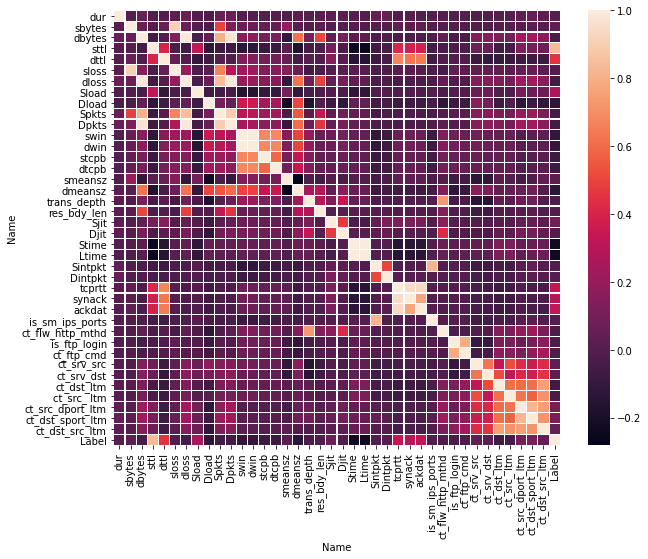

In [13]:
##correlaation matrix 
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), xticklabels=True, linewidths=0.1)
plt.show()

In [14]:
labels = pd.DataFrame(data.Label)

In [15]:
labels.to_csv('anomaly_labels.csv', index=False)

In [16]:
#dropping unnecessary variables
data_normal = data.drop(['srcip', 'dstip','sport', 'dsport', 'attack_cat', 'Label'], axis=1)

### Univariate and Multivariate Analysis

In [17]:
data_analysis = data_normal.copy()

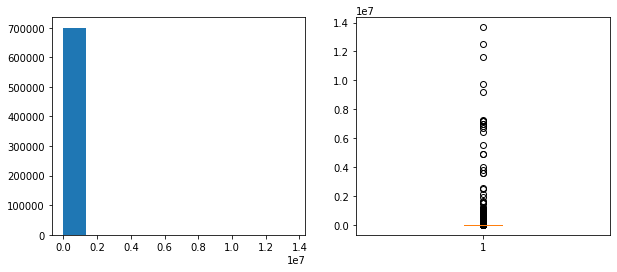

In [18]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.hist(data_analysis['sbytes'])
plt.subplot(1,2,2)
plt.boxplot(data_analysis['sbytes'])
plt.show()

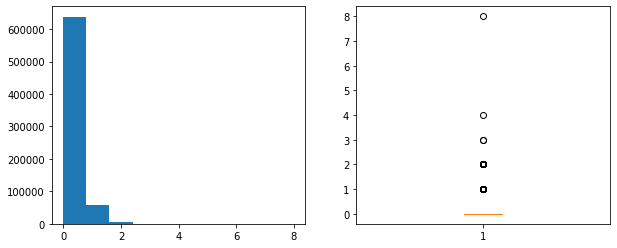

In [19]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.hist(data_analysis['trans_depth'])
plt.subplot(1,2,2)
plt.boxplot(data_analysis['trans_depth'])
plt.show()

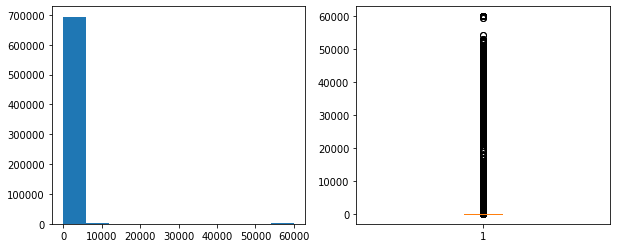

In [20]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.hist(data_analysis['Sintpkt'])
plt.subplot(1,2,2)
plt.boxplot(data_analysis['Sintpkt'])
plt.show()

In [21]:
# categorical variables
cat_cols = data_normal.select_dtypes(exclude= ['number']).columns
cat_cols

Index(['proto', 'state', 'service', 'is_sm_ips_ports', 'ct_state_ttl',
       'is_ftp_login'],
      dtype='object', name='Name')

In [22]:
# numerical variables
num_cols = data_normal.select_dtypes(include= ['number']).columns
num_cols

Index(['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'Sload',
       'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz',
       'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit', 'Stime',
       'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat',
       'ct_flw_http_mthd', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst',
       'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm'],
      dtype='object', name='Name')

In [23]:
# normalizing numerical data
data_normal[num_cols] = normalize(data_normal[num_cols])

In [24]:
#scaler = StandardScaler()
#standart_data = scaler.fit_transform(data_normal[num_cols])

In [25]:
data_normal = pd.get_dummies(data_normal, columns = cat_cols, drop_first=True)

In [26]:
data_normal

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,...,state_RST,state_TST,state_TXD,state_URH,state_URN,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,is_sm_ips_ports_True,ct_state_ttl_1,ct_state_ttl_2,ct_state_ttl_3,ct_state_ttl_4,ct_state_ttl_5,ct_state_ttl_6,is_ftp_login_True
0,5.246383e-13,6.564195e-08,8.155515e-08,1.541591e-08,1.442134e-08,0.000000e+00,0.000000e+00,0.000249,0.000309,9.945750e-10,9.945750e-10,0.000000e+00,0.000000e+00,0.000000,0.000000,3.282097e-08,4.077757e-08,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.707107,0.707107,8.453887e-12,6.464737e-12,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.796849e-11,2.625678e-07,1.511754e-07,1.541591e-08,1.442134e-08,0.000000e+00,0.000000e+00,0.000044,0.000025,1.989150e-09,1.989150e-09,0.000000e+00,0.000000e+00,0.000000,0.000000,6.564195e-08,3.779385e-08,0.000000e+00,0.000000,4.918676e-09,5.312390e-09,0.707107,0.707107,3.483499e-09,3.761649e-09,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5.564647e-13,7.260397e-08,8.851717e-08,1.541591e-08,1.442134e-08,0.000000e+00,0.000000e+00,0.000260,0.000316,9.945750e-10,9.945750e-10,0.000000e+00,0.000000e+00,0.000000,0.000000,3.630199e-08,4.425859e-08,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.707107,0.707107,8.453887e-12,6.464737e-12,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6.012206e-13,6.564195e-08,8.155515e-08,1.541591e-08,1.442134e-08,0.000000e+00,0.000000e+00,0.000217,0.000270,9.945750e-10,9.945750e-10,0.000000e+00,0.000000e+00,0.000000,0.000000,3.282098e-08,4.077758e-08,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.707107,0.707107,2.138336e-11,6.962025e-12,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5.813291e-13,7.260397e-08,8.851717e-08,1.541591e-08,1.442134e-08,0.000000e+00,0.000000e+00,0.000248,0.000303,9.945750e-10,9.945750e-10,0.000000e+00,0.000000e+00,0.000000,0.000000,3.630199e-08,4.425859e-08,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.707107,0.707107,2.486437e-12,1.491862e-12,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699996,4.097688e-12,6.433107e-08,3.767388e-07,6.232072e-09,5.830003e-09,2.010346e-10,4.020692e-10,0.000021,0.000129,1.206208e-09,1.608277e-09,5.126382e-08,5.126382e-08,0.645057,0.648434,1.065483e-08,4.704209e-08,0.000000e+00,0.000000,4.278232e-08,6.190247e-10,0.285862,0.285862,8.056260e-10,4.075833e-10,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
699997,4.430378e-10,6.129456e-06,3.435432e-04,9.789446e-09,9.157869e-09,6.315772e-10,1.168418e-07,0.000035,0.001956,1.149470e-07,2.355783e-07,8.052609e-08,8.052609e-08,0.089462,0.767283,1.673680e-08,4.604198e-07,3.157886e-10,0.000001,6.436052e-08,3.605472e-08,0.449037,0.449037,1.220216e-09,5.944471e-10,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
699998,1.998086e-12,6.066220e-07,6.926398e-07,8.714218e-09,8.152011e-09,1.686623e-09,1.686623e-09,0.000655,0.000747,6.746491e-09,6.746491e-09,7.168147e-08,7.168147e-08,0.197699,0.800854,2.529934e-08,2.895369e-08,0.000000e+00,0.000000,4.955250e-09,1.216109e-10,0.399717,0.399717,7.709581e-11,8.024895e-11,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
699999,2.205426e-12,2.824536e-07,1.511724e-07,1.541560e-08,1.442105e-08,0.000000e+00,0.000000e+00,0.000382,0.000205,1.989110e-09,1.989110e-09,0.000000e+00,0.000000e+00,0.000000,0.000000,7.061341e-08,3.779309e-08,0.000000e+00,0.000000,8.148410e-10,6.915355e-10,0.707107,0.707107,5.796600e-10,4.909785e-10,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
data_normal.to_csv('/content/drive/MyDrive/Colab Notebooks/Project/data.csv', index=False)

In [29]:
from sklearn.ensemble import IsolationForest
from sklearn import metrics

In [31]:
#df = pd.read_csv('data.csv')
df = data_normal

In [32]:
df.head()

,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,Dload,Spkts,Dpkts,swin,dwin,stcpb,dtcpb,smeansz,dmeansz,trans_depth,res_bdy_len,Sjit,Djit,Stime,Ltime,Sintpkt,Dintpkt,...,state_RST,state_TST,state_TXD,state_URH,state_URN,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,is_sm_ips_ports_True,ct_state_ttl_1,ct_state_ttl_2,ct_state_ttl_3,ct_state_ttl_4,ct_state_ttl_5,ct_state_ttl_6,is_ftp_login_True
0,5.246383e-13,6.564195e-08,8.155515e-08,1.541591e-08,1.442134e-08,0.0,0.0,0.000249,0.000309,9.945750e-10,9.945750e-10,0.0,0.0,0.0,0.0,3.282097e-08,4.077757e-08,0.0,0.0,0.000000e+00,0.000000e+00,0.707107,0.707107,8.453887e-12,6.464737e-12,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.796849e-11,2.625678e-07,1.511754e-07,1.541591e-08,1.442134e-08,0.0,0.0,0.000044,0.000025,1.989150e-09,1.989150e-09,0.0,0.0,0.0,0.0,6.564195e-08,3.779385e-08,0.0,0.0,4.918676e-09,5.312390e-09,0.707107,0.707107,3.483499e-09,3.761649e-09,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5.564647e-13,7.260397e-08,8.851717e-08,1.541591e-08,1.442134e-08,0.0,0.0,0.000260,0.000316,9.945750e-10,9.945750e-10,0.0,0.0,0.0,0.0,3.630199e-08,4.425859e-08,0.0,0.0,0.000000e+00,0.000000e+00,0.707107,0.707107,8.453887e-12,6.464737e-12,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,6.012206e-13,6.564195e-08,8.155515e-08,1.541591e-08,1.442134e-08,0.0,0.0,0.000217,0.000270,9.945750e-10,9.945750e-10,0.0,0.0,0.0,0.0,3.282098e-08,4.077758e-08,0.0,0.0,0.000000e+00,0.000000e+00,0.707107,0.707107,2.138336e-11,6.962025e-12,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5.813291e-13,7.260397e-08,8.851717e-08,1.541591e-08,1.442134e-08,0.0,0.0,0.000248,0.000303,9.945750e-10,9.945750e-10,0.0,0.0,0.0,0.0,3.630199e-08,4.425859e-08,0.0,0.0,0.000000e+00,0.000000e+00,0.707107,0.707107,2.486437e-12,1.491862e-12,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
df.shape

(700001, 206)

In [34]:
labels = pd.read_csv('anomaly_labels.csv')
labels.Label = [-x if x == 1 else 1 for x in labels.Label ]
anomaly_labels = labels.Label

In [35]:
iso_model = IsolationForest(random_state=0).fit(df)

anomaly_preds = iso_model.predict(df)
pd.crosstab(anomaly_labels, anomaly_preds)

col_0,-1,1
Label,,
-1,13935,8280
1,34965,642821


In [36]:
print(metrics.silhouette_score(df, anomaly_preds, metric='euclidean'))

0.24433044569620146
